# Analysis of houses in different regions

We use the combined data tsv (which includes different data from [numbeo](https://www.numbeo.com/cost-of-living/prices_by_city.jsp)). We can rank different cities based on region, affordability and other metrics.

In [32]:
import pandas as pd
# import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display

In [33]:
df = pd.read_csv("numbeo_data_JAN25/combined_data.tsv", sep='\t', header=0)
df.columns

Index(['City', 'Average Monthly Net Salary (After Tax) (in USD)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate (in USD)',
       'Apartment (1 bedroom) in City Centre (in USD)',
       'Apartment (1 bedroom) Outside of Centre (in USD)',
       'Apartment (3 bedrooms) in City Centre (in USD)',
       'Apartment (3 bedrooms) Outside of Centre (in USD)',
       'Price per Square Meter to Buy Apartment in City Centre (in USD)',
       'Price per Square Meter to Buy Apartment Outside of Centre (in USD)',
       'Region', 'Continent'],
      dtype='object')

In [34]:
df.head()

,City,Average Monthly Net Salary (After Tax) (in USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate (in USD)",Apartment (1 bedroom) in City Centre (in USD),Apartment (1 bedroom) Outside of Centre (in USD),Apartment (3 bedrooms) in City Centre (in USD),Apartment (3 bedrooms) Outside of Centre (in USD),Price per Square Meter to Buy Apartment in City Centre (in USD),Price per Square Meter to Buy Apartment Outside of Centre (in USD),Region,Continent
0,"San Francisco, CA, United States",7531.53,6.57,3199.85,2830.43,5703.28,4623.81,11067.61,10173.76,Northern America,America
1,"Zurich, Switzerland",7339.69,2.30,2471.93,1979.89,4396.38,3318.12,24071.34,16644.22,Western Europe,Europe
2,"Geneva, Switzerland",7108.17,2.48,2082.56,1857.12,4243.66,3413.59,17984.51,14601.31,Western Europe,Europe
3,"Seattle, WA, United States",6674.67,6.42,2289.71,1844.44,4580.73,3436.77,7277.16,5477.16,Northern America,America
4,"Lausanne, Switzerland",6372.50,2.50,1678.18,1332.70,3109.76,2717.57,17273.76,11613.44,Western Europe,Europe


## Recoup Duration

As a landlord, it is important to know the amount of time it takes to make even ("recoup your investement"). That is equivelant to doubling the money (ceteris paribus, i.e. the house prices don't increase, which does not happen in real life).

In [35]:
# what are the places that are more worth buying and house and then renting it out?
# what are the fastest cities to recoup your investment? (the higher the rent + the lower the price to buy => the faster the recoup)

df['Recoup Ratio'] = (
    df['Apartment (1 bedroom) in City Centre (in USD)'] / 
    df['Price per Square Meter to Buy Apartment in City Centre (in USD)']
)
df = df.sort_values('Recoup Ratio', ascending=False)

best_recoup, worst_recoup = df['Recoup Ratio'].iloc[0], df['Recoup Ratio'].iloc[-1]

print(f"{best_recoup=:.4f} vs {worst_recoup=:.4f} ({best_recoup/worst_recoup} x faster)")

best_recoup=0.8235 vs worst_recoup=0.0446 (18.464314348090987 x faster)


In [44]:
# # assuming average apartment (1 bedroom) has between 45 to 90 square meters (let's say 60 sq.m.)
# # and then calculate years of recoup (divide by 12 months)
# df['House Price Estimate'] = df['Price per Square Meter to Buy Apartment in City Centre (in USD)']*60

df['House Price Estimate'] = (df['Price per Square Meter to Buy Apartment in City Centre (in USD)']*60).round(0).astype(int)

In [60]:
# what are the places that are more worth buying and house and then renting it out?
# what are the fastest cities to recoup your investment? (the higher the rent + the lower the price to buy => the faster the recoup)

df['Recoup Duration Factor'] = (
    df['Price per Square Meter to Buy Apartment in City Centre (in USD)'] / 
        df['Apartment (1 bedroom) in City Centre (in USD)']) # the lower the duration, the better


df = df.sort_values('Recoup Duration Factor', ascending=True, ignore_index=True)

df['Recoup Duration Estimate'] = df['Recoup Duration Factor']*60 / 12

best_recoup_dur, worst_recoup_dur = df['Recoup Duration Estimate'].iloc[0], df['Recoup Duration Estimate'].iloc[-1]
print(f"{best_recoup_dur=:2.1f} vs {worst_recoup_dur=:.1f} ({worst_recoup_dur/best_recoup_dur:.1f} x faster) (same as before)")

best_recoup_dur=6.1 vs worst_recoup_dur=112.1 (18.5 x faster) (same as before)


We conclude that there is huge difference between the time to recoup.
Essentially this is the time for 100% profit (or doubling). The fastest time for recoup is 3 years and the slowest time is 56 year. 

The calculation above is a generous estimate, it doesn't account renovation costs, costs for fixing during lifetime of house, initial cost to buy, ...

Also, for recoup we don't get increase in value into account (Ceteris paribus, all else being equal).

In order to find the annual compound interest rate of an investement, I have to use the compount interst formula:

$$A=P⋅(1+r)^t$$

Where:

* $A$ is the future value of the investment.
* $P$ is the initial principal (starting amount).
* $r$ is the annual interest rate (as a decimal).
* $t$ is the time in years.

The `Recoup Duration Estimate` is essentially the duration of years to double the investement (keep the house and gain in rent the same amount as well, ceteris paribus the house does not gain any value).

$$2P = P⋅(1+r)^t = P a^t \Rightarrow a^t = 2 \Rightarrow (1+r) = a = \sqrt[t]{2} $$



In [61]:
df['Recoup Effective Rate'] = 2**(1/df['Recoup Duration Estimate'])

In [62]:
# ceteris paribus, recoup duration in years for south european cities
pd.set_option('display.max_rows', 200)
# df[ df['Region'] == 'Southern Europe' ][['City', 'Recoup Duration Estimate', 'House Price Estimate']]
df[ df['Continent'] == 'Europe' ][['City', 'Recoup Duration Estimate', 'House Price Estimate', 'Recoup Effective Rate']]

# random_region = random.choice(list(set(df['Region'])))
# df[ df['Region'] == random_region ][['City', 'Recoup Duration Estimate']]

,City,Recoup Duration Estimate,House Price Estimate,Recoup Effective Rate
39,"Belfast, United Kingdom",12.900904,167581,1.055198
42,"Cork, Ireland",13.352298,253469,1.053283
47,"Glasgow, United Kingdom",13.900720,213602,1.051128
52,"Valencia, Spain",14.947543,196786,1.047464
55,"Liverpool, United Kingdom",15.078925,192812,1.047041
60,"Chisinau, Moldova",15.605542,107791,1.045418
65,"Reykjavik, Iceland",16.209990,382862,1.043688
66,"Rotterdam, Netherlands",16.285323,315002,1.043481
68,"Groningen, Netherlands",16.362359,202645,1.043272
75,"Dublin, Ireland",17.382930,427676,1.040681


The best combination is in a city with small recoup duration and low initial investement.

Furthermore, we get in the best case an effective rate of 2.5% - 4%, which is way less than stcoks 8% average (e.g. S&P500).

[Text(0.5, 1.0, 'Recoup Duration Estimate Histogram'),
 Text(0, 0.5, 'Amount of cities')]

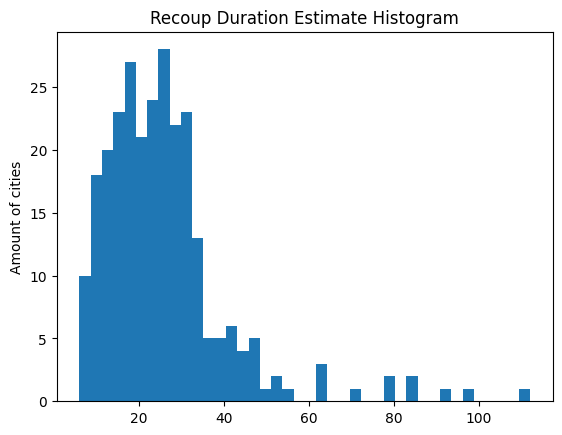

In [47]:
plt.hist(df['Recoup Duration Estimate'], bins=40)
plt.gca().set(title='Recoup Duration Estimate Histogram', ylabel='Amount of cities')


In [48]:
df.tail(15)

,City,Average Monthly Net Salary (After Tax) (in USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate (in USD)",Apartment (1 bedroom) in City Centre (in USD),Apartment (1 bedroom) Outside of Centre (in USD),Apartment (3 bedrooms) in City Centre (in USD),Apartment (3 bedrooms) Outside of Centre (in USD),Price per Square Meter to Buy Apartment in City Centre (in USD),Price per Square Meter to Buy Apartment Outside of Centre (in USD),Region,Continent,Recoup Ratio,House Price Estimate,Recoup Duration Factor,Recoup Duration Estimate,Years to Buy House on Average Salary
186,"Zurich, Switzerland",7339.69,2.30,2471.93,1979.89,4396.38,3318.12,24071.34,16644.22,Western Europe,Europe,0.102692,1444280,9.737873,48.689364,16.398063
149,"Lausanne, Switzerland",6372.50,2.50,1678.18,1332.70,3109.76,2717.57,17273.76,11613.44,Western Europe,Europe,0.097152,1036426,10.293151,51.465755,13.553362
259,"Mumbai, India",896.58,9.04,659.13,353.82,1798.23,908.28,6792.27,3201.42,Southern Asia,Asia,0.097041,407536,10.304902,51.524510,37.878773
247,"Tel Aviv-Yafo, Israel",3419.29,5.30,1697.93,1259.44,3089.52,2219.56,18662.58,13178.20,Western Asia,Asia,0.090980,1119755,10.991372,54.956859,27.290139
235,"Chengdu, China",839.42,4.42,309.44,166.30,599.71,303.49,3835.17,1982.84,Eastern Asia,Asia,0.080685,230110,12.393905,61.969526,22.844166
256,"Hong Kong, Hong Kong (China)",3619.81,4.01,2089.58,1558.40,4664.04,3203.58,26361.11,16147.45,Eastern Asia,Asia,0.079268,1581667,12.615506,63.077532,36.412284
267,"Kathmandu, Nepal",233.81,12.84,177.39,95.63,292.47,186.37,2265.64,1167.39,Southern Asia,Asia,0.078296,135938,12.772084,63.860421,48.450451
251,"Suzhou, China",993.46,4.02,428.14,221.37,1082.15,522.44,6006.83,3344.71,Eastern Asia,Asia,0.071276,360410,14.030060,70.150301,30.231866
266,"Beijing, China",1541.14,3.85,917.85,503.04,2049.91,1100.34,14594.48,6831.31,Eastern Asia,Asia,0.062890,875669,15.900725,79.503623,47.349624
255,"Hangzhou, China",1125.74,4.04,511.33,279.37,1122.95,658.31,8144.40,4336.33,Eastern Asia,Asia,0.062783,488664,15.927874,79.639372,36.173539


Looking at this we understand that landlording isn't really worth it in China and India. Probably there is governmental limit in rents.

## Affordability for locals

It's important to know how expensive is a house in comparison to the average local salaries. Essentially, how many months/years does a local resident need to get paid in order to buy a house? 

In [52]:
df['Years to Buy House on Average Salary'] = (df['House Price Estimate'] / df['Average Monthly Net Salary (After Tax) (in USD)'] / 12).round(1)


In [53]:
df = df.sort_values('Years to Buy House on Average Salary', ascending=True, ignore_index=True)
df[ df['Continent'] == 'Europe' ][['City', 'Years to Buy House on Average Salary', 'House Price Estimate', 'Average Monthly Net Salary (After Tax) (in USD)']]

,City,Years to Buy House on Average Salary,House Price Estimate,Average Monthly Net Salary (After Tax) (in USD)
22,"Aberdeen, United Kingdom",4.0,168056,3462.98
36,"Belfast, United Kingdom",5.2,167581,2693.95
37,"Groningen, Netherlands",5.3,202645,3169.76
39,"Glasgow, United Kingdom",5.5,213602,3213.06
40,"Liverpool, United Kingdom",5.9,192812,2723.28
47,"Essen, Germany",6.5,236957,3021.12
48,"Mannheim, Germany",6.7,322468,3999.58
49,"Cork, Ireland",6.7,253469,3162.04
50,"The Hague (Den Haag), Netherlands",6.8,313504,3858.76
52,"Eindhoven, Netherlands",7.3,307054,3499.87
